# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
#np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Load data

Alternative for csv without header
flower_train = pd.read_csv(
    "C:\Users\mariu\Dropbox\Programming\PythonMachineLearning\iris_flowers.csv",
    names=["sepal_length","sepal_width","petal_length", "petal_width,class])

In [3]:
#Alternative for csv without header
#flower_train = pd.read_csv(
#    "C:\Users\mariu\Dropbox\Programming\PythonMachineLearning\iris_flowers.csv",
#    names=["sepal_length","sepal_width","petal_length","petal_width","class"])


flower_train = pd.read_csv(
    "iris_flowers.csv",
    header=0)

flower_train.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


# Separate the labels into separate dataframe

In [4]:
#Copy of original dataframe
flower_features = flower_train.copy()
#pop creates new df and removes the clumn from the old dataframe
flower_labels_categories = flower_features.pop('class')

#flower_features.head()
flower_labels_categories.head()

0    iris_setosa
1    iris_setosa
2    iris_setosa
3    iris_setosa
4    iris_setosa
Name: class, dtype: object

# Normalize data

In [5]:
#normalize = layers.Normalization()
#normalize.adapt(flower_features)

# Get number of categories from labels

In [6]:
#for final layer in tf
len(flower_labels_categories.unique())

3

#  Convert labels to numerical

In [7]:
flower_labels=pd.Categorical(flower_labels_categories).codes
flower_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

# Convert back to category test

In [8]:
int_label = 2
pd.Categorical(flower_labels_categories).categories[int_label]

'iris_virginica'

# Create Model

In [9]:
norm_flower_model = tf.keras.Sequential([
#  normalize,
  #layers.Dense(64),
  #layers.Dense(3)
  layers.Dense(30, activation = 'relu',   name = "L1"),
  layers.Dense(10, activation = 'relu',   name = "L2"),
  layers.Dense(3, activation = 'linear', name = "L3")
])

# Compile Model

In [10]:
norm_flower_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit Model

In [11]:
history = norm_flower_model.fit(flower_features, flower_labels, epochs=80)

Epoch 1/80
5/5 [==============================] - 1s 4ms/step - loss: 1.1818 - accuracy: 0.3333
Epoch 2/80
5/5 [==============================] - 0s 2ms/step - loss: 1.1307 - accuracy: 0.3333
Epoch 3/80
5/5 [==============================] - 0s 2ms/step - loss: 1.0979 - accuracy: 0.3333
Epoch 4/80
5/5 [==============================] - 0s 3ms/step - loss: 1.0716 - accuracy: 0.3333
Epoch 5/80
5/5 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.3333
Epoch 6/80
5/5 [==============================] - 0s 2ms/step - loss: 1.0405 - accuracy: 0.3333
Epoch 7/80
5/5 [==============================] - 0s 2ms/step - loss: 1.0300 - accuracy: 0.3400
Epoch 8/80
5/5 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.3600
Epoch 9/80
5/5 [==============================] - 0s 2ms/step - loss: 1.0090 - accuracy: 0.3667
Epoch 10/80
5/5 [==============================] - 0s 2ms/step - loss: 0.9981 - accuracy: 0.3533
Epoch 11/80
5/5 [======================

# Plot

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

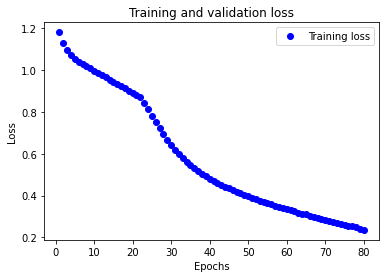

In [13]:
acc = history_dict['accuracy']
#val_acc = history_dict['val__accuracy']
loss = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Use model to predict example

In [14]:
testdata=flower_features

predictions = norm_flower_model.predict(testdata)
predictions

5/5 [==============================] - 0s 1ms/step


array([[ 2.672604  , -0.99950564, -4.6790066 ],
       [ 2.5325837 , -0.85012805, -4.321689  ],
       [ 2.49408   , -0.9369638 , -4.3661637 ],
       [ 2.4948516 , -0.85288376, -4.276747  ],
       [ 2.6584086 , -0.9946034 , -4.661218  ],
       [ 2.80167   , -0.9726455 , -4.8579664 ],
       [ 2.4697833 , -0.9198788 , -4.3397565 ],
       [ 2.6510181 , -0.9705709 , -4.6174164 ],
       [ 2.3873544 , -0.81278276, -4.084451  ],
       [ 2.593832  , -0.87554634, -4.432663  ],
       [ 2.808219  , -1.0425905 , -4.9109464 ],
       [ 2.5950627 , -0.9032762 , -4.484755  ],
       [ 2.5360017 , -0.8879463 , -4.3605843 ],
       [ 2.3374734 , -0.87756974, -4.085091  ],
       [ 2.9014292 , -1.1372477 , -5.1406417 ],
       [ 2.9240756 , -1.1493987 , -5.222151  ],
       [ 2.734706  , -1.0979513 , -4.8904934 ],
       [ 2.6442442 , -1.0036353 , -4.649974  ],
       [ 2.9249163 , -1.0282768 , -5.0567026 ],
       [ 2.6921    , -1.0180707 , -4.751338  ],
       [ 2.782123  , -0.8379499 , -4.664

In [15]:
prediction_max=np.argmax(predictions[70])
prediction_max

1

In [16]:
pd.Categorical(flower_labels_categories).categories[prediction_max]

'iris_versicolor'

In [19]:
correct=0
incorrect=0
for i in range(len(predictions)):
    prediction_max=np.argmax(predictions[i])
    print("Prediction " + pd.Categorical(flower_labels_categories).categories[prediction_max])
    print("Actual     " + flower_labels_categories[i])
    if pd.Categorical(flower_labels_categories).categories[prediction_max]==flower_labels_categories[i]:
        correct+=1
    else:
        incorrect+=1


Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     iris_setosa
Prediction iris_setosa
Actual     

In [20]:
print('Correct: '+str(correct))
print('Incorrect: '+str(incorrect))

Correct: 146
Incorrect: 4
